# Ford Gobike Data Exploration 
## by Abdulganiyu Salaudeen

## Introduction
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

See the data [here](https://www.ford.com/)



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
sb.set_style('darkgrid')

%matplotlib inline

##  Loading and Assessing Data


In [3]:
df = pd.read_csv('fordgobike_tripdata.csv')

### Analyzing the dataset

In [4]:
#Shape of the dataset
df.shape

(183412, 16)

In [5]:
#sample of the dataset
df.sample(10)

duration_sec                start_time                  end_time  \
23844           1247  2019-02-25 19:04:18.1560  2019-02-25 19:25:05.8480   
48791            333  2019-02-22 07:05:50.8570  2019-02-22 07:11:24.7120   
11411            346  2019-02-27 18:40:21.8910  2019-02-27 18:46:08.8640   
9932             142  2019-02-27 22:53:48.0670  2019-02-27 22:56:10.8990   
49083            260  2019-02-22 00:38:21.9820  2019-02-22 00:42:42.2960   
172784           861  2019-02-03 14:40:01.9850  2019-02-03 14:54:23.5330   
109022           524  2019-02-12 20:24:29.1640  2019-02-12 20:33:14.1030   
7636             623  2019-02-28 08:52:51.9110  2019-02-28 09:03:15.5740   
107093           618  2019-02-13 16:57:57.5610  2019-02-13 17:08:15.6880   
93541            467  2019-02-15 17:34:42.2110  2019-02-15 17:42:29.3840   

        start_station_id            start_station_name  \
23844               16.0       Steuart St at Market St   
48791              215.0      34th St at Telegraph Ave   
11411               66.0         3rd St at Townsend St   
9932               240.0     Haste St at Telegraph Ave   
49083              134.0        Valencia St at 24th St   
172784              70.0        Central Ave at Fell St   
109022              93.0  4th St at Mission Bay Blvd S   
7636                41.0    Golden Gate Ave at Polk St   
107093             144.0                  Precita Park   
93541               52.0     McAllister St at Baker St   

        start_station_latitude  start_station_longitude  end_station_id  \
23844                37.794130              -122.394430            85.0   
48791                37.822547              -122.266318           183.0   
11411                37.778742              -122.392741            27.0   
9932                 37.866043              -122.258804           253.0   
49083                37.752428              -122.420628           145.0   
172784               37.773311              -122.444293            44.0   
109022               37.770407              -122.391198            50.0   
7636                 37.781270              -122.418740            20.0   
107093               37.747300              -122.411403            98.0   
93541                37.777416              -122.441838            43.0   

                                         end_station_name  \
23844                             Church St at Duboce Ave   
48791                            Telegraph Ave at 19th St   
11411                             Beale St at Harrison St   
9932                              Haste St at College Ave   
49083                                29th St at Church St   
172784  Civic Center/UN Plaza BART Station (Market St ...   
109022                              2nd St at Townsend St   
7636      Mechanics Monument Plaza (Market St at Bush St)   
107093                             Valencia St at 16th St   
93541   San Francisco Public Library (Grove St at Hyde...   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
23844              37.770083            -122.429156     3379  Subscriber   
48791              37.808702            -122.269927       54  Subscriber   
11411              37.788059            -122.391865     5008  Subscriber   
9932               37.866418            -122.253799     6001  Subscriber   
49083              37.743684            -122.426806     5168  Subscriber   
172784             37.781074            -122.411738     5319  Subscriber   
109022             37.780526            -122.390288     3710  Subscriber   
7636               37.791300            -122.399051     6258  Subscriber   
107093             37.765052            -122.421866      961  Subscriber   
93541              37.778768            -122.415929      764  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
23844              1993.0          Male                      No  
48791              1987.0        Female                      No  

In [8]:
#Dataset discription
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

 > 1. The following column datatypes need to be changed: 
       `start_time`, `end_time`, `member_birth_year` to Datetime datatype
       `start_station_id`, `end_station_id `, `bike_id` to String datatype
       `user_type`,`member_gender` to Category dattype

In [85]:
# checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [86]:
# unique values in columes with the missing values

print(df.start_station_id.nunique())
print(df.member_gender.value_counts())

print(df.member_birth_year.nunique())

329
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64
75


> Would leave the missing data the way they are and continue with my eploratory visulization. They might not affect the result. 



In [87]:
# Checking for dublicate rows
df.duplicated().sum()

0

### Cleaning Dataset

In [88]:
#making a copy of the dataframe
df_clean = df.copy()



#### Define: Change inaccurate column datatye to the appropraite datatype
        

#### Code

In [126]:
# change the data type for bike_id, start_station_id, and end_station_id to String
def change_to_string (df,fields):
    for field in fields:
        df[field] = df[field].astype(str)
    return df

df_clean = change_to_string (df_clean,['start_station_id',
                                       'end_station_id','bike_id'])

In [90]:
# change the data type for start and end time to be datetime64[ns]
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [127]:
# change the data type for user_type, member_gender, and bike_share_for_all_trip to category
def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')
    return df

df_clean = change_to_category (df_clean,['user_type', 'member_gender',
                                        'bike_share_for_all_trip'])


In [128]:
# Inspecting if the changes were made
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

#### Define: Create a new column called `Member_age` by subtracting the    current year from `member_birth_year` 

#### Code

In [93]:
#add a new column calculating riders' age from 'member_birth_year'

df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [94]:
# Exclude events where members age are above 70 years of age
df_clean = df_clean.query('member_age <= 70')


In [95]:
df_clean.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

In [96]:
# change the data type for member_age and end member_birth_yearto be int 
df_clean.member_birth_year = df_clean.member_birth_year.astype('int')
df_clean.member_age = df_clean.member_age.astype('int')

#### Define:Create new columns for days of week,month,hour for 

#### Code 

In [97]:
# minutes will be very helpful so making a new column
df_clean['duration_minute'] = df_clean['duration_sec']/60


In [98]:
# splitting the start_time into hour,day,date,month
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

#### Test:

In [99]:
df_clean

duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
0                  21.0  Montgomery St BART Station (Market St at 2nd St)   
2                  86.0                           Market St at Dolores St   
3                 375.0                           Grove St at Masonic Ave   
4                   7.0                               Frank H Ogawa Plaza   
5                  93.0                      4th St at Mission Bay Blvd S   
...                 ...                                               ...   
183407             27.0                           Beale St at Harrison St   
183408             21.0  Montgomery St BART Station (Market St at 2nd St)   
183409            278.0                            The Alameda at Bush St   
183410            220.0                       San Pablo Ave at MLK Jr Way   
183411             24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude end_station_id  \
0                    37.789625              -122.400811           13.0   
2                    37.769305              -122.426826            3.0   
3                    37.774836              -122.446546           70.0   
4                    37.804562              -122.271738          222.0   
5                    37.770407              -122.391198          323.0   
...                        ...                      ...            ...   
183407               37.788059              -122.391865          324.0   
183408               37.789625              -122.400811           66.0   
183409               37.331932              -121.904888          277.0   
183410               37.811351              -122.273422          216.0   
183411               37.789677              -122.390428           37.0   

                                    end_station_name  end_station_latitude  \
0                     Commercial St at Montgomery St             37.794231   
2       Powell St BART Station (Market St at 4th St)             37.786375   
3                             Central Ave at Fell St             37.773311   
4                              10th Ave at E 15th St             37.792714   
5                                 Broadway at Kearny             37.798014   
...                                              ...                   ...   
183407           Union Square (Powell St at Post St)             37.788300   
183408                         3rd St at Townsend St             37.778742   
183409                     Morrison Ave at Julian St             37.333658   
183410                      San Pablo Ave at 27th St             37.817827   
183411                           2nd St at Folsom St             37.785000   

        ...   user_type member_birth_year member_gender  \
0       ...    Customer              1984          Male   
2       ...    Customer              1972          Male   
3       ...  Subscriber              1989         Other   
4       ...  Subscriber              1974          Male   
5       ...  Subscriber              1959          Male   
...     ...         ...               

#### Define: Change the datatype of the columns created

#### Code:

In [100]:
#changing the datatype of newly created columns
df_clean['start_month'] = df_clean['start_month'].astype('category')
df_clean['start_day'] = df_clean['start_day'].astype('category')


#### Test:

In [101]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

> Null values are present but would be ignored. might have little to no effect on the result

### Test

In [102]:
#rename the clened dataframe
ford = df_clean

In [103]:
ford.bike_share_for_all_trip.value_counts()

No     157398
Yes     17174
Name: bike_share_for_all_trip, dtype: int64

In [125]:
# Saving cleaned dataset to file
ford.to_csv('bike_master_clean.csv', index = False)

### What is the structure of your dataset?

* **Trip Duration:** duration_sec, start_time, end_time

* **Station Info:** start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude 

* **Bike Info:** bike_id, user_type, bike_share_for_all_trip

* **Member Info:** member_birth_year, member_gender

* **Additional Columns Created:** member_age, start_hour, start_day, start_date, start_month


### What is/are the main feature(s) of interest in your dataset?

* Well there are many things I would like to explore. I'm most interested in figuring out how the Start of a ride is dependent on other features such as: age, start station, end station, user type, bike share and gender from the dataset. I would like to find patterns between User types (customers and subscribers), genders (Male,Female and others).


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* All time related time base would help alot with my analysis. I will use the gender and customer related data, as well as the duration to understand the effect if plays on age gender and many more.

## Univariate Exploration



Here, I investigate distributions of individual variables. This is also in preparation to look at some the relationships between variables.

In [105]:
# setting the base color
color = sb.color_palette()[0]

In [106]:
ford.member_birth_year.describe()

count    174572.000000
mean       1984.964261
std           9.712795
min        1949.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

#### What is the distribution of member birth year?

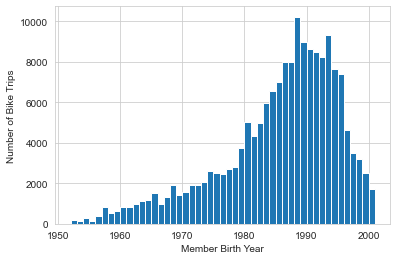

In [107]:
# Plottig Member birth year histogram
bin_edges = np.arange(1952, 2001+1, 1)
ticks = [1950, 1960, 1970,1980, 1990, 2000]
labels = ['{}'.format(val) for val in ticks]


plt.hist(data = ford, x ='member_birth_year', bins = bin_edges);

plt.xlabel('Member Birth Year')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

* The plot above shows that the birth year distribution is between 1980 to 2000. this indicates that more trips were taken by the birth year group.

#### Number of trips in a week

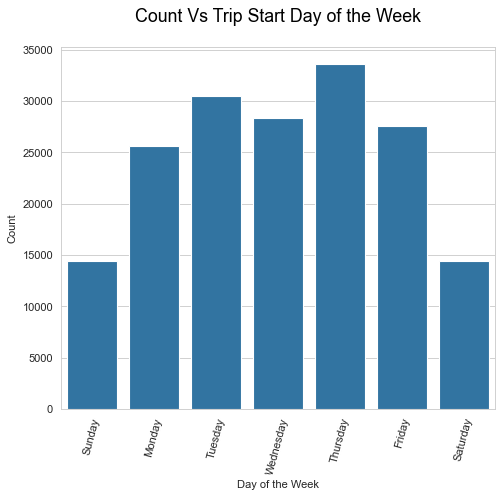

In [108]:
#defining the size of the figure
fig = plt.figure(figsize=(7, 6), dpi= 80, facecolor='w', edgecolor='k')

type=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']
sb.countplot(data=ford, x='start_day',order=type,color=color);

#for better visbility rotating the ticks by 75
plt.xticks(rotation=75);
plt.xlabel('Day of the Week');
plt.ylabel('Count');
plt.title('Count Vs Trip Start Day of the Week', y=1.05, fontsize=16, color = 'black');


* In the case of trips taken in a week, you can see that more trips were taken on Thursdays compare to other days of the week.

#### Which gender has the highest ride usage?

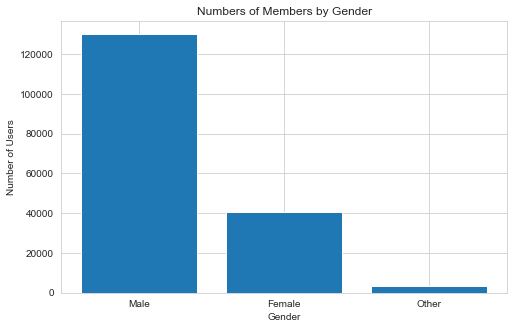

In [109]:
# plotting the the numbers of member genders
plt.figure(figsize=[8,5])
plt.bar(x = ford.member_gender.value_counts().keys(), height = ford.member_gender.value_counts() )
plt.title('Numbers of Members by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

* The result shows that Other gender type had the least number of bike usage while Male gender had the highest usage.

#### Are there more customers than subcribers?

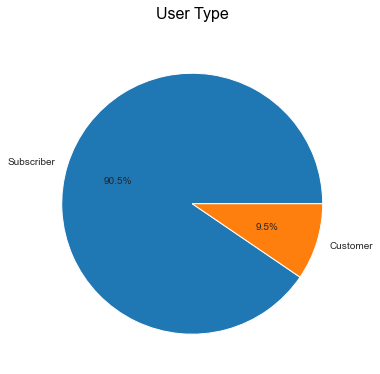

In [110]:
# plotting numbers of users type 
ut = ford['user_type'].value_counts()
plt.figure(figsize = (6,6))

plt.pie(ut, labels= ut.index,autopct= '%1.1f%%')
plt.title('User Type', y=1.05, fontsize=16, color = 'black');


* The visual above demonstrates the overwhelming majority of bike users are subscribers, with about 97.3% of the total users.

#### Trip duration distribution

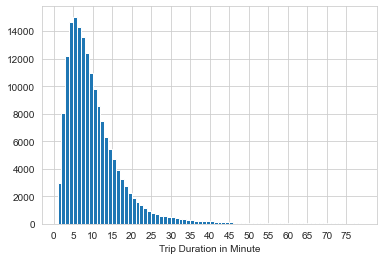

In [111]:
# plottin trip duration distribution in minutes

bins = np.arange(1, 80, 1)
ticks = np.arange(0, 80, 5)
plt.hist(data=ford, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

* It looks like 99% of the trips were less than 1 hour long with majority of them fell between 5 to 10 minutes range.

In [112]:
# filter out outlier trip records where the duration was very long or above imagination

ford = ford.query('duration_minute <= 80')
ford.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  173642.000000           173642.000000            173642.000000   
mean      628.039979               37.770761              -122.351148   
std       478.496950                0.101218                 0.118572   
min        61.000000               37.317298              -122.453704   
25%       322.000000               37.770083              -122.411901   
50%       508.000000               37.780760              -122.398279   
75%       783.000000               37.797320              -122.281193   
max      4798.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  \
count         173642.000000          173642.000000      173642.000000   
mean              37.770952            -122.350720        1984.969575   
std                0.101119               0.118125           9.710139   
min               37.317298            -122.453704        1949.000000   
25%               37.770407            -122.411647        1980.000000   
50%               37.781010            -122.397405        1987.000000   
75%               37.797673            -122.285171        1992.000000   
max               37.880222            -121.874119        2001.000000   

          member_age  duration_minute  
count  173642.000000    173642.000000  
mean       34.030425        10.467333  
std         9.710139         7.974949  
min        18.000000         1.016667  
25%        27.000000         5.366667  
50%        32.000000         8.466667  
75%        39.000000        13.050000  
max        70.000000        79.966667

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The dataset distributions were normal. Though soume colummn values were off.

* Member-wise, there were more male riders than female, and most members were subscribers compared to casual riders. and most were around 25 to 40 years old.
* Thursday has more ride trip compare to other days of the week.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* From the data, the start month was just februry. 
* The trip duration feature was unusal. had to adjust the datasete

## Bivariate Exploration

 >Here, I will investigate relationships and distributions between pairs of variables from the data.

#### Member age and gender violin graph

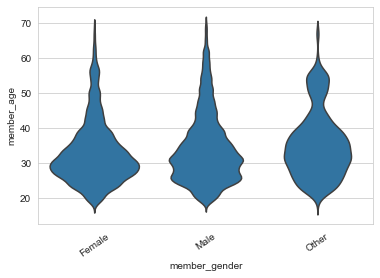

In [113]:
# Violin graph of member age vs gender
sb.violinplot(data = ford ,x = 'member_gender',
              y='member_age',color = color,inner=None);
plt.xticks(rotation=35);

#### Violin graph of trip duration vs gender

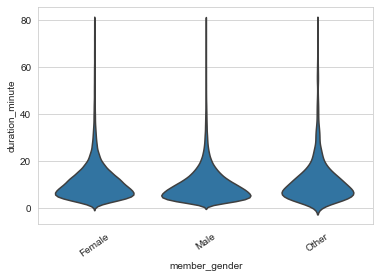

In [114]:
# Violin graph of trip duration vs gender
sb.violinplot(data = ford ,x = 'member_gender',
              y='duration_minute',color = color,inner=None);
plt.xticks(rotation=35);

* There is higer concentration females that a very high travel duration  than males but less than other

#### Weekly usage between customers and subscribers

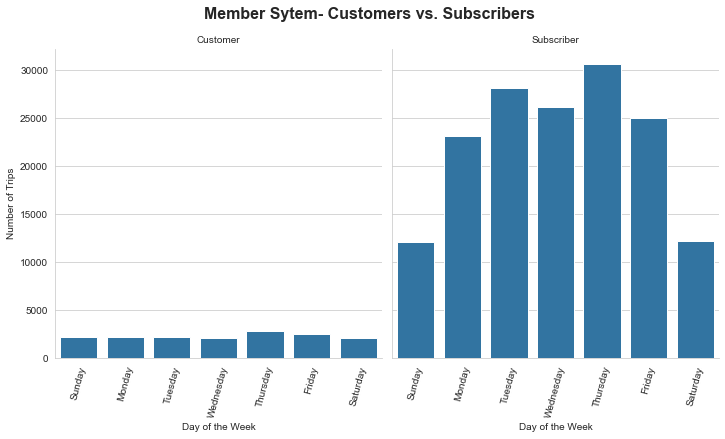

In [115]:
# Customer Usage by Day vs. Subscriber Usage by Day
orda=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']
plot = sb.catplot(data=ford, x='start_day', 
                col="user_type", kind='count', sharey = True,
                  color = color, order = orda);

plot.set_axis_labels("Day of the Week", "Number of Trips");
plot.set_titles("{col_name}");

plot.fig.suptitle('Member Sytem- Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

* Weekend tends to be lowest period for bike usage. There is high usage of bike during the working days of the week, the highest is from Tuesday till Thursday, reaching its peak on Thursday.

#### Relationship between member age and trip duration

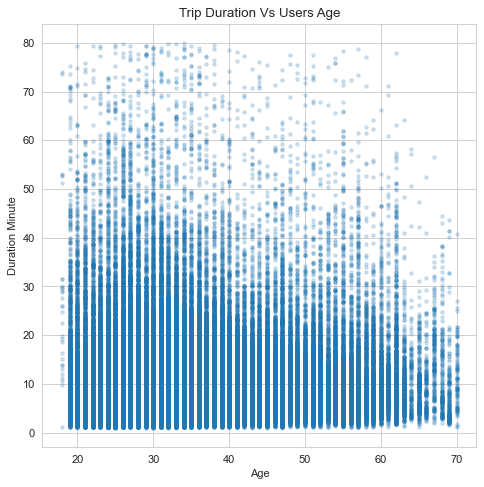

In [116]:
fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter( ford['member_age'], ford['duration_minute'], 
                    alpha = 0.2, marker = '.')

plt.title('Trip Duration Vs Users Age')
plt.xlabel('Age')
plt.ylabel('Duration Minute')
plt.show()

* By looking at the chart above, we can see that most frequent users aged between 20 and 45. This shows that trip duration is registered by younger members.

#### Distribution between trip duration and user type (Box plot)

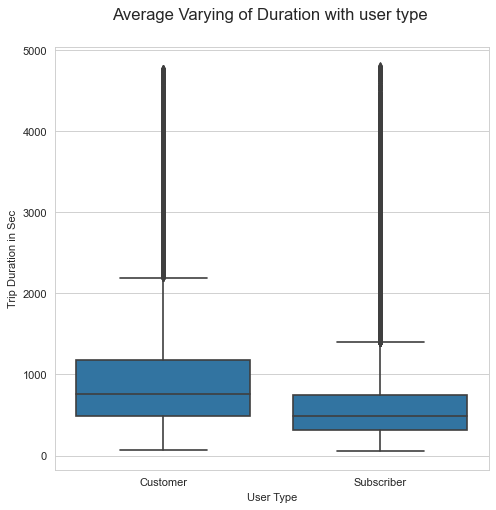

In [117]:
#Distribution between trip duration in secs and user type
fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')

#plotting a volin plot
sb.boxplot(data=ford, x='user_type', y='duration_sec',
              color= color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Sec');
plt.title('Average Varying of Duration with user type ',
          y=1.05, fontsize=15);


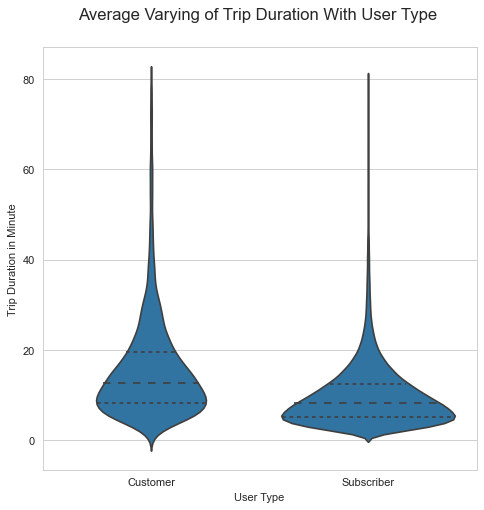

In [118]:
#Distribution between trip duration in minute and user type

fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')

#plotting a volin plot
sb.violinplot(data=ford, x='user_type', y='duration_minute',
              color= color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Average Varying of Trip Duration With User Type ',
          y=1.05, fontsize=15);


* From the two plots, we can see that higher percentage of customers take longer trips than subscriber, although the number of subscriber riders are much higher than that of customers.


#### Trip duration by weekdays

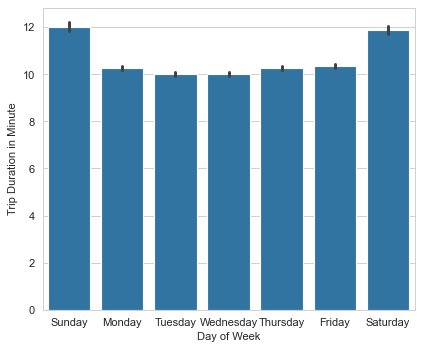

In [119]:
#Trip duration on days of the week

fig=plt.figure(figsize=(6,5), dpi= 80, facecolor='w', edgecolor='k')
order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']

#plotting bar chart
sb.barplot(data=ford, x='start_day', y='duration_minute', order = order,
           color=color);
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute');

* The trip duration are much shorter duringthe workdays (Monday - Friday), compared to weekends. It indicates that there is a more casual flexible use of bikes on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Subscribers carried out more number of trips customers but lesser trip duration compare to customers.
* Also, alot of trip tend to start on thrusday for both customer and subcriber.
* Riders betweeen the age 30-40 spend more time riding bike.
* Weekend (sunday and saturday)seams to be when longer trip duration occur

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Yeah, I noticed that Customers carryout longer trip duation than Subscribers. This shows that Subscribers are mostly routine oriented and have fix duration.

## Multivariate Exploration

>Here, I will investigate relationships and distributions between multiple variables from the data.

#### What is the relationship between User type, gender and the duration covered?

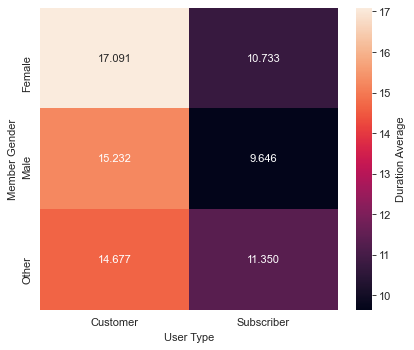

In [120]:
# Relationship between User type, gender and the duration covered
fig=plt.figure(figsize=(6,5), dpi= 80, facecolor='w', edgecolor='k')

avg_dis= ford.groupby(['member_gender', 'user_type']).mean()['duration_minute']
avg_dis = avg_dis.reset_index(name = 'avg_duration')
avg_dis = avg_dis.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'avg_duration')
sb.heatmap(avg_dis, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Duration Average'});

plt.xlabel('User Type');
plt.ylabel('Member Gender');

* This plots confirm some of the observations made earlier i this analysis. Its depicts that Customers takes longer trip duration than Subscribers.
* Also shows that the Female gender takes longer average trip duration compare to others.

#### Relationship between user type, their gender and the trip start day of the week.

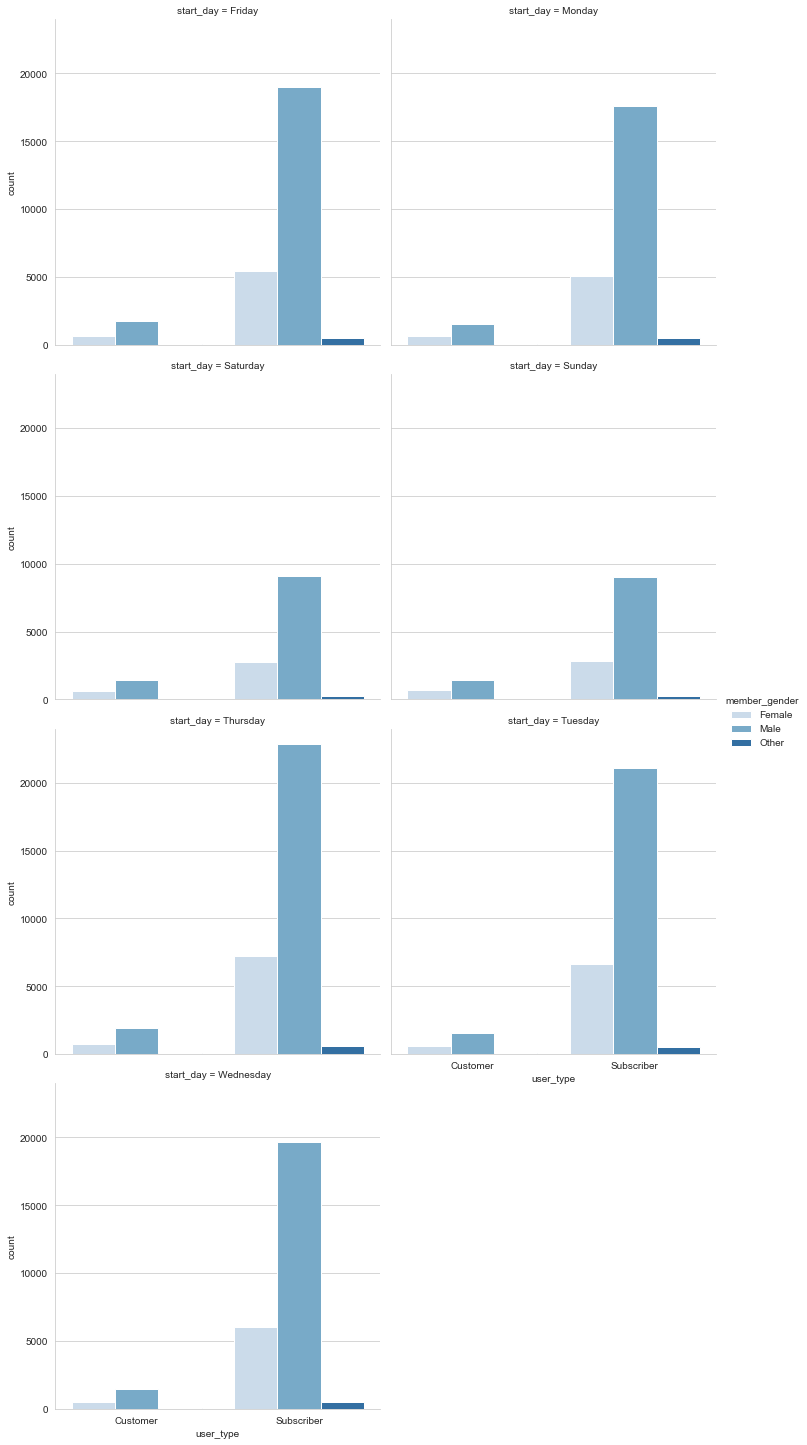

In [121]:
#Relationship between user type, their gender and the trip start day of the week.
types=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']

sb.catplot(x = 'user_type', hue = 'member_gender',
            col = 'start_day',
            data = ford, kind = 'count', palette = 'Blues', col_wrap = 2);


* This shows that Subscribers take the highest number of trips for all the days of the week.
* The male gender had the highest bike usage for bothe Customer and Subscribers

#### Comparing daily bike trips per customers, based on their age group 

In [122]:
ford['age_group'] = ford.member_age.apply(lambda x: '15 - 29' if 15<x<=29
                                     else '30 - 45' if 30<=x<=45
                                     else '46 - 59' if 46<=x<=59
                                     else '69 - 70' if 60<=x<=70
                                                       else x)

custom_age = ford[ford['user_type']
                    == 'Customer'].groupby(['start_day', 
                        'age_group']).agg({'bike_id':'count'}).reset_index()


<ipython-input-122-99e9aa660402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford['age_group'] = ford.member_age.apply(lambda x: '15 - 29' if 15<x<=29


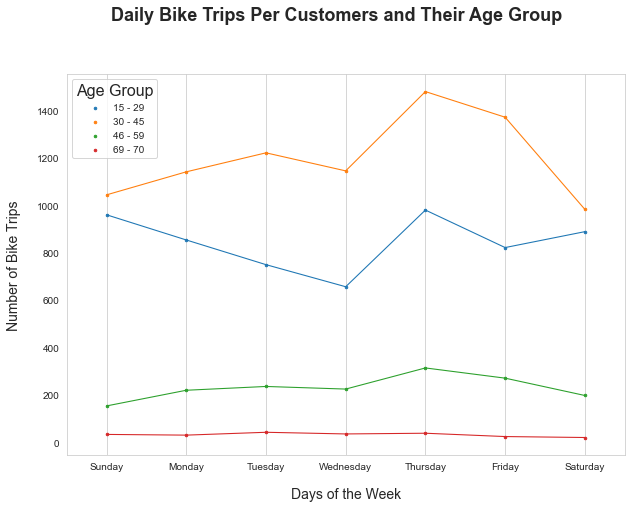

In [123]:
# Comparing daily bike trips per customers, based on their age group 
plt.figure(figsize=[10, 7]);
sb.set_style('whitegrid')


days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
      'Friday', 'Saturday']

pt = sb.pointplot(data = custom_age, x='start_day',
            y='bike_id', hue='age_group', scale=.4, order = days);

# Title, labels and legend
plt.xlabel('Days of the Week', labelpad = 16, fontsize =14)
plt.ylabel('Number of Bike Trips', labelpad = 16, fontsize =14)
plt.suptitle('Daily Bike Trips Per Customers and Their Age Group', 
             fontsize=18, fontweight='semibold', y=1.015);
gend = pt.legend()
gend.set_title('Age Group', prop={'size': 16})

plt.grid()

* Customers who fall in the age group between 30-45 years old are the most common age group to take more bike trips. The 30-45 years old also lead the spike which occurs across all age groups on Thursday.

#### Trip Duration, Gender, and Age Relaionship

C:\Users\ssaKAAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


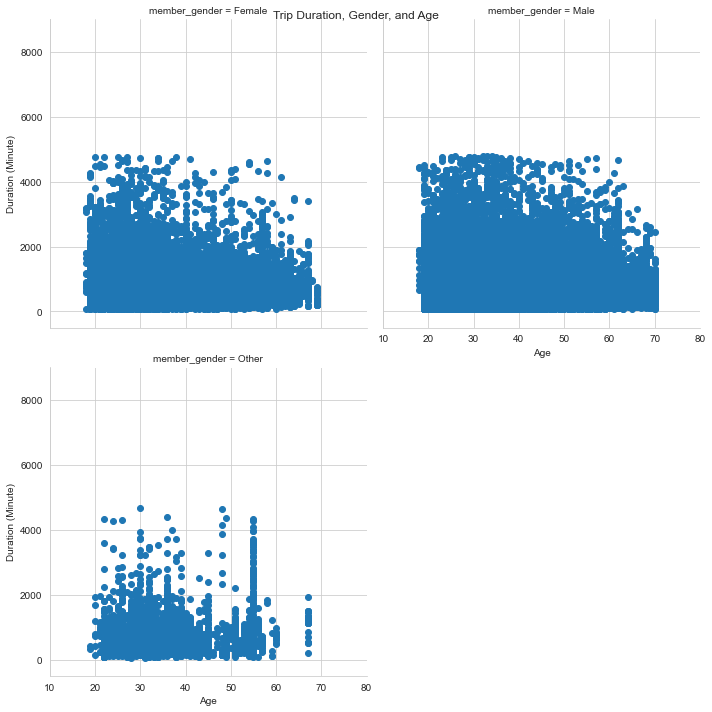

In [124]:
#Trip Duration, Gender, and Age Relaionship
member = sb.FacetGrid(data = ford, col = 'member_gender', col_wrap = 2, 
                      size = 5,xlim = [10, 80], ylim = [-500, 9000]);
member.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1);

member.set_xlabels('Age');
member.set_ylabels('Duration (Minute)');
member.fig.suptitle('Trip Duration, Gender, and Age');
plt.show()

*  For all genders, we can see that the trip duration trends occur more between 20 -40 years age group. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Well the observations from multivariate help strengthen some relationships patterns discovered in the previous bivariate and univariate exploration.
* Subscirbers and customers vary alot. Subscirbers are consitent have a fixed schedule, have lesser durations than customers. 
* Also, in all the days of the week, the results shows that Male subsribers take more rides than any othe gender.  

### Were there any interesting or surprising interactions between features?

* Well after carrying out the eploratory analysis all interactions make sense. Surely most of the observations were interesting. Female customers have the  highst trip duration average than male and other genders.

## Conclusions

Renting a bike from the Ford GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. 

This project is focused on the trip start month of February base on the data used. The result shows that Trip Duration is so dependendable on th user type and the gender of the member, if its a subscriber, the trip duration is lesser than that of a customer. But, there are a lot more subscriber usage than customers overall. The riding habit/pattern varies a lot between subscribers and customers. 

More rides occur on Thursdays for both subscribers and customers. this indicates that bike sharing system operates more during work days(Mo-Fri)

Bike usaage is so dependendable on the age groups of the member, when the age is between 30 to 45, the usage of bike is higher than the other age groups for all the weekdays. 30 - 45 years age group carried out a total number of trips more than 1400 trips on Thursday for the month of feburary, which was the highest number of trips taken compare to other days of the week. 